In [33]:
import json


with open('/home/nermakovaa/semester_4/SNA/SNA/data/data.json', 'r') as file:
    data = json.load(file)
    
print(data)

[{'vk': [{'groupId': '19817989', 'posts': [{'id': 2221808, 'text': 'А еще мне удалось попробовать еще одну #ВВновинку -Пирожки постные с рисом и грибами. Пирожки-великолепные. Хорошее тесто и много начинки! Грибочки в начинке -очень понравились!', 'views': None, 'forwards': 0, 'replies': [{'text': 'Мне они тоже понравились 🔥', 'sender_id': 103700096, 'date': 1713129164, 'reactions': [{'emoji': 'like', 'count': 4}], 'replies': 2, 'sender_name': 'Любовь', 'last_name': 'Креминская', 'sex': 1, 'city': 'Санкт-Петербург', 'bdate': '23.4'}], 'date': 1713127426, 'reactions': [{'emoji': 'like', 'count': 30}]}, {'id': 2221793, 'text': 'Хотела поделиться впечатлением об 🔥 этом печенье-#ВВновинку Печенье сахарное с изюмом. Очень вкусное печенье,нежное на вкус. Изюм придает пикантность. Пачку очень быстро съели! Всем советуем!', 'views': None, 'forwards': 0, 'replies': [{'text': 'Мы только первую быстро скушали, ❤ а после второй решили, что наелись и больше не хотим 😂', 'sender_id': 380405, 'date':

## Tg

### Love Rate

In [5]:
def love_rate(data):
    """
    Коэффициент привлекательности (Love Rate)
    (Количество лайков / Общее количество уникальных просмотров ) * 100%
    """
    total_views = 0
    total_likes = 0

    for i in data:
        for item in i['tg']:
            total_views += sum([0 if _["views"] is None else _["views"] for _ in item["posts"]])
            total_likes += sum([reaction["count"] for post in item["posts"] for reaction in post["reactions"] if reaction["emoji"] == "❤"])

    if total_views > 0 and total_likes > 0:
        love_rate = (total_likes / total_views) * 100
        return love_rate
    else:
        return 0
    
    
love_rate(data)

1.1029618652810864

### Engagement Rate 

In [6]:
def engagement_rate(data):
    '''
    Коэффициент вовлеченности (Engagement Rate)
    (Общее число взаимодействий / Общее число подписчиков) * 100%
    '''
    total_interactions = 0
    total_comments = 0

    for i in data:
        for item in i['tg']:
            followers = item['membersCount']
            likes = sum(reaction['count'] for post in item['posts'] for reaction in post['reactions'])
            reposts = sum(post['forwards'] for post in item['posts'])

            unique_sender_ids = set(comment['sender_id'] for post in item['posts'] for comment in post.get('replies', []))

            total_comments += len(unique_sender_ids)
            total_interactions += likes + total_comments + reposts

    if total_interactions > 0 and followers > 0:
        engagement_rate = (total_interactions / followers) * 100
        return engagement_rate
    else:
        return 0


engagement_rate(data)

0.9626264357963312

### Engagement Rate By Reach

In [23]:
def engagement_rate_by_reach(data):
    '''
    Коэффициент вовлеченности (Engagement Rate By Reach)
    (Общее число взаимодействий / Общее количество уникальных просмотров) * 100%
    '''
    total_interactions = 0
    total_comments = 0
    total_views = 0

    for i in data:
        for item in i['tg']:
            total_views += sum([0 if _["views"] is None else _["views"] for _ in item["posts"]])
            
            likes = sum(reaction['count'] for post in item['posts'] for reaction in post['reactions'])
            reposts = sum(post.get('forwards', 0) for post in item['posts'])  

            unique_sender_ids = set(comment['sender_id'] for post in item['posts'] for comment in post.get('replies', []))

            total_comments += len(unique_sender_ids)
            total_interactions += likes + total_comments + reposts

    if total_interactions > 0 and total_views > 0:
        engagement_rate_by_reach = (total_interactions / total_views) * 100
        return engagement_rate_by_reach
    else:
        return 0


engagement_rate_by_reach(data)

2.106507099848061

### Показатель аудиторного охвата

In [65]:
from datetime import datetime


def audience_coverage(data):
    '''
    Показатель аудиторного охвата (Audience Coverage)
    (Количество лайков/просмотров/репостов/комментариев уникальных пользователей) / (Количество дней рассматриваемого периода) 
    '''
    for i in data:
        for item in i['tg']:
            total_interactions = item["membersCount"]
            
            start_date = datetime.strptime(item["from"], "%d/%m/%Y")
            end_date = datetime.strptime(item["to"], "%d/%m/%Y")
            days_between = (end_date - start_date).days
                
    if total_interactions > 0 and days_between > 0:
        audience_coverage = (total_interactions / days_between) 
        return int(audience_coverage)
    else:
        return 0
    
    
audience_coverage(data)

23332

### Channel Citation Index

In [77]:
def channel_citation_index(data):
    """
    Индекс цитируемости (Channel Citation Index)
    (Количество репостов / Общее количество уникальных просмотров) * 100%
    """
    total_views = 0
    total_reposts = 0

    for i in data:
        for item in i['tg']:
            valid_posts = [post for post in item["posts"] if post["views"] is not None] 
            total_views += sum([post["views"] for post in valid_posts])
            total_reposts = sum(post.get('forwards', 0) for post in item['posts'])  

    if total_views > 0 and total_reposts > 0:
        channel_citation_index = (total_reposts / total_views) * 100
        return channel_citation_index
    else:
        return 0
    
    
channel_citation_index(data)

0.25698261146855245

### Discussion Rate

In [127]:
def discussion_rate(data):
    """
    Обсуждаемость постов (Discussion Rate)
    (Количество подкомментариев) / (Количество уникальных пользователей в подкомментариях) * 100% 
    """
    for i in data:
        for item in i['tg']:
            comment = [comment['sender_id'] for post in item['posts'] for comment in post.get('replies', [])]
            
            total_comment = len(comment)
            unique_sender_ids = len(set(comment))
            
    if unique_sender_ids == 1:
        return 1
    else:
        discussion_rate = (total_comment / unique_sender_ids) * 100
        return discussion_rate
            

discussion_rate(data)

150.0

### Sentimental Analysis for messages

In [8]:
from transformers import pipeline


def top_regions(data):
    '''
    Топ-20 регионов с наибольшим числом пользователей
    [регион | пользователей | % | тональность]
    '''
    # https://huggingface.co/blanchefort/rubert-base-cased-sentiment модель для анализа тональности
    classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment") 

    city_users = {}

    total_users = 0
    
    for i in data:
        for item in i['tg']:
            for post in item['posts']:
                for reply in post.get('replies', []):
                    city = reply.get('city', 'Unknown')
                    if city not in city_users:
                        city_users[city] = []
                    city_users[city].append(reply['sender_id'])
                    total_users += 1

    city_stats = {}
    for city, users in city_users.items():
        users_count = len(users)
        percent = (users_count / total_users) * 100

        user_messages = [post['text'] for post in item['posts'] for post in post['replies'] if post.get('city') == city and post['text'] is not None]
        classified_messages = classifier(user_messages)
        len_messages = len(classified_messages)
        positive = len([i for i in classified_messages if i['label']=='POSITIVE']) / len_messages
        negative = len([i for i in classified_messages if i['label']=='NEGATIVE']) / len_messages
        neutral = len([i for i in classified_messages if i['label']=='NEUTRAL']) / len_messages

        city_stats[city] = {
            'users_count': users_count,
            'percent': percent,
            'user_messages': user_messages,
            'positive': positive,
            'negative': negative,
            'neutral': neutral
        }

    # Оставляем топ-20, сортируем city_stats по users_count 
    sorted_city_stats = dict(sorted(city_stats.items(), key=lambda x: x[1]['users_count'], reverse=True)[:20])

    top_regions = json.dumps(sorted_city_stats, indent=4, ensure_ascii=False)
    return top_regions


result = top_regions(data)
print(result)

{
    "null": {
        "users_count": 9,
        "percent": 100.0,
        "user_messages": [
            "А почему у вас нет воды легенда гор в 19 литровых бутылках?))",
            "Бенто со сгущенкой",
            "О, словечки вернулись",
            "Добрый день, Алина",
            "Полностью поддерживаем вас в этом выборе",
            "Я на хлебной планете уже 7 лет)",
            "Любимое мороженое. И на Пломбирной планете можно было бы пополнять бесконечно ведерко",
            "Промокодов для постоянных клиентов давно не было("
        ],
        "positive": 0.125,
        "negative": 0.125,
        "neutral": 0.75
    }
}


### Net Promoter Score

In [113]:
from transformers import pipeline


def net_promoter_score(data):
    """
    Лояльность пользователей (Net Promoter Score)
    ((Положительные комментарии - Негативные комментарии) / Всего комментариев) * 100%
    """
    classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment") 

    for i in data:
        for item in i['tg']:
            total_messages = [post['text'] for post in item['posts'] for post in post['replies'] if post['text'] is not None]
            print(total_messages)
            len_total_messages = len(total_messages)
            
            classified_messages = classifier(total_messages)
            positive_count = sum(1 for i in classified_messages if i['label'] == 'POSITIVE')
            negative_count = sum(1 for i in classified_messages if i['label'] == 'NEGATIVE')

    if len_total_messages > 0:
        net_promoter_score = ((positive_count - negative_count) / len_total_messages) * 100
        return net_promoter_score
    else:
        return 0
    
    
net_promoter_score(data)

['А почему у вас нет воды легенда гор в 19 литровых бутылках?))', 'Бенто со сгущенкой', 'О, словечки вернулись', 'Добрый день, Алина', 'Полностью поддерживаем вас в этом выборе', 'Я на хлебной планете уже 7 лет)', 'Любимое мороженое. И на Пломбирной планете можно было бы пополнять бесконечно ведерко', 'Промокодов для постоянных клиентов давно не было(']


0.0

### Тональность комментариев по длине символов

In [195]:
from transformers import pipeline


def character_length(data):
    '''
    Распределение тональности комментариев по длине символов
    [количество символов | тональность]
    '''
    lists = []
    results = []
    
    # https://huggingface.co/blanchefort/rubert-base-cased-sentiment модель для анализа тональности
    classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment") 
    
    # диапазоны длин символов
    dict_lengths = {1: '0-10', 2: '11-50', 3: '51-100', 4: '101-200', 5: '201+'}

    comments_lengths = {
        dict_lengths[1]: [],
        dict_lengths[2]: [],
        dict_lengths[3]: [],
        dict_lengths[4]: [],
        dict_lengths[5]: [] 
    }

    for group in data:
        for post in group['tg'][0]['posts']:
            for reply in post['replies']:
                if reply['text'] != None:
                    comment_length = len(reply['text'])
                    if comment_length < int(dict_lengths[1].split('-')[1])+1:
                        comments_lengths[dict_lengths[1]].append(reply['text'])
                    elif int(dict_lengths[1].split('-')[1])+1 <= comment_length <= int(dict_lengths[2].split('-')[1])+1:
                        comments_lengths[dict_lengths[2]].append(reply['text'])
                    elif int(dict_lengths[2].split('-')[1])+1 <= comment_length <= int(dict_lengths[3].split('-')[1])+1:
                        comments_lengths[dict_lengths[3]].append(reply['text'])
                    elif int(dict_lengths[3].split('-')[1])+1 <= comment_length <= int(dict_lengths[4].split('-')[1])+1:
                        comments_lengths[dict_lengths[4]].append(reply['text'])
                    else:
                        comments_lengths[dict_lengths[5]].append(reply['text'])

    for lengths in comments_lengths.keys():
        lists.append([classifier(_) for _ in comments_lengths[lengths]])
        
    length_keys = dict_lengths.values()

    for list in lists:
        total_score = sum(dict['score'] for sublist in list for dict in sublist)

        distribution = {'positive': 0, 'negative': 0, 'neutral': 0} 
        if total_score != 0:
            for sublist in list:
                for dict in sublist:
                    distribution[dict['label'].lower()] += (dict['score'] / total_score) * 100

        results.append(distribution)

    comments_lengths_sentimentary = {}
    for i, dist in zip(length_keys, results):
        comments_lengths_sentimentary[i] = dist

    return comments_lengths_sentimentary


character_length(data)

{'0-10': {'positive': 0, 'negative': 0, 'neutral': 0},
 '11-50': {'positive': 0,
  'negative': 19.524068842154584,
  'neutral': 80.47593115784542},
 '51-100': {'positive': 54.90797873326216,
  'negative': 0,
  'neutral': 45.092021266737845},
 '101-200': {'positive': 0, 'negative': 0, 'neutral': 0},
 '201+': {'positive': 0, 'negative': 0, 'neutral': 0}}

### Топ эмодзи

In [16]:
def top_emoji(data):
    '''
    Топ-5 эмодзи
    [эмодзи | количество упоминаний эмодзи]
    '''
    reactions_summary = {}
    
    for group in data:
        posts = (post_item for item in group['tg'] for post_item in item['posts'])
        
        for post_item in posts:
            reactions = post_item.get('reactions', {})
            
            if reactions is not None:
                for reaction in filter(lambda r: r['emoji'] is not None, reactions):
                    emoji = reaction['emoji']
                    count = reaction['count']
                    
                    reactions_summary[emoji] = reactions_summary.get(emoji, 0) + count

    top_reactions = dict(sorted(reactions_summary.items(), key=lambda x: x[1], reverse=True)[:5])
    return top_reactions  
    
    
top_emoji(data)

{'❤': 588, '👍': 82, '🔥': 74, '🤣': 71, '👎': 36}

## ВКонтакте

### Love Rate

In [19]:
def love_rate(data):
    """
    Коэффициент привлекательности (Love Rate)
    (Количество лайков / Общее количество уникальных просмотров) * 100%
    """
    total_views = 0
    total_likes = 0

    for i in data:
        for item in i['vk']:
            valid_posts = [post for post in item["posts"] if post["views"] is not None] # только те посты, где просмотры != None
            total_views += sum([post["views"] for post in valid_posts])
            total_likes += sum([reaction["count"] for post in valid_posts for reaction in post["reactions"] if reaction["emoji"] == "like"])

    if total_views > 0 and total_likes > 0:
        love_rate = (total_likes / total_views) * 100
        return love_rate
    else:
        return 0
    
    
love_rate(data)

35.0

### Engagement Rate 

In [29]:
def engagement_rate(data):
    '''
    Коэффициент вовлеченности (Engagement Rate)
    (Общее число взаимодействий / Общее число подписчиков) * 100%
    '''
    total_interactions = 0
    total_comments = 0

    for i in data:
        for item in i['vk']:
            followers = item['membersCount']
            likes = sum(reaction['count'] for post in item['posts'] for reaction in post['reactions'])
            reposts = sum(post['forwards'] for post in item['posts'])

            unique_sender_ids = set(comment['sender_id'] for post in item['posts'] for comment in post.get('replies', []))

            total_comments += len(unique_sender_ids)
            total_interactions += likes + total_comments + reposts

    if total_interactions > 0 and followers > 0:
        engagement_rate = (total_interactions / followers) * 100
        return engagement_rate
    else:
        return 0


engagement_rate(data)

0.135772935928105

### Engagement Rate By Reach

In [22]:
def engagement_rate_by_reach(data):
    '''
    Коэффициент вовлеченности (Engagement Rate By Reach)
    (Общее число взаимодействий / Общее количество уникальных просмотров) * 100%
    '''
    total_interactions = 0
    total_comments = 0
    total_views = 0

    for i in data:
        for item in i['vk']:
            valid_posts = [post for post in item["posts"] if post["views"] is not None] 
            total_views += sum([post["views"] for post in valid_posts])
            
            likes = sum(reaction['count'] for post in item['posts'] for reaction in post['reactions'])
            reposts = sum(post.get('forwards', 0) for post in item['posts'])  

            unique_sender_ids = set(comment['sender_id'] for post in item['posts'] for comment in post.get('replies', []))

            total_comments += len(unique_sender_ids)
            total_interactions += likes + total_comments + reposts

    if total_interactions > 0 and total_views > 0:
        engagement_rate_by_reach = (total_interactions / total_views) * 100
        return engagement_rate_by_reach
    else:
        return 0


engagement_rate_by_reach(data)

87.5

### Показатель аудиторного охвата

In [78]:
from datetime import datetime


def audience_coverage(data):
    '''
    Показатель аудиторного охвата (Audience Coverage)
    (Уникальные пользователи (Количество лайков + количество просмотров + количество репостов + количестко комментариев + 
    количество лайков комментариев)) / (Количество дней рассматриваемого периода) 
    '''
    total_interactions = 0
    total_comments = 0
    total_views = 0

    for i in data:
        for item in i['vk']:
            valid_posts = [post for post in item["posts"] if post["views"] is not None] 
            total_views += sum([post["views"] for post in valid_posts])
            
            likes_comments = sum([reaction['count'] for post in item['posts'] for comment in post.get('replies', []) for reaction in comment.get('reactions', [])])
            total_likes = sum(reaction['count'] for post in item['posts'] for reaction in post['reactions']) + likes_comments
            
            reposts = sum(post.get('forwards', 0) for post in item['posts'])  

            unique_sender_ids = set(comment['sender_id'] for post in item['posts'] for comment in post.get('replies', []))

            total_comments += len(unique_sender_ids)
            total_interactions += total_likes + total_comments + reposts + total_views
            
            start_date = datetime.strptime(item["from"], "%d/%m/%Y")
            end_date = datetime.strptime(item["to"], "%d/%m/%Y")
            days_between = (end_date - start_date).days
                
    if total_interactions > 0 and days_between > 0:
        audience_coverage = (total_interactions / days_between) 
        return int(audience_coverage)
    else:
        return 0
    
    
audience_coverage(data)

52

### Channel Citation Index

In [79]:
def channel_citation_index(data):
    """
    Индекс цитируемости (Channel Citation Index)
    (Количество репостов / Общее количество уникальных просмотров) * 100%
    """
    total_views = 0
    total_reposts = 0

    for i in data:
        for item in i['vk']:
            valid_posts = [post for post in item["posts"] if post["views"] is not None] 
            total_views += sum([post["views"] for post in valid_posts])
            total_reposts = sum(post.get('forwards', 0) for post in item['posts'])  

    if total_views > 0 and total_reposts > 0:
        channel_citation_index = (total_reposts / total_views) * 100
        return channel_citation_index
    else:
        return 0
    
    
channel_citation_index(data)

0

### Discussion Rate

In [128]:
def discussion_rate(data):
    """
    Обсуждаемость постов (Discussion Rate)
    (Количество подкомментариев / Количество уникальных пользователей в подкомментариях) * 100% 
    """
    for i in data:
        for item in i['vk']:
            comment = [comment['sender_id'] for post in item['posts'] for comment in post.get('replies', [])]
            
            total_comment = len(comment)
            unique_sender_ids = len(set(comment))
            
    if unique_sender_ids == 1:
        return 1
    else:
        discussion_rate = (total_comment / unique_sender_ids) * 100
        return discussion_rate
            

discussion_rate(data)

114.28571428571428

### Sentimental Analysis for messages

In [28]:
from transformers import pipeline


def top_regions(data):
    '''
    Топ-20 регионов с наибольшим числом пользователей
    [регион | пользователей | % | тональность]
    '''
    # https://huggingface.co/blanchefort/rubert-base-cased-sentiment модель для анализа тональности
    classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment") 

    city_users = {}

    total_users = 0
    
    for i in data:
        for item in i['vk']:
            for post in item['posts']:
                for reply in post.get('replies', []):
                    city = reply.get('city', 'Unknown')
                    if city not in city_users:
                        city_users[city] = []
                    city_users[city].append(reply['sender_id'])
                    total_users += 1

    city_stats = {}
    for city, users in city_users.items():
        users_count = len(users)
        percent = (users_count / total_users) * 100

        user_messages = [post['text'] for post in item['posts'] for post in post['replies'] if post.get('city') == city and post['text'] is not None]
        classified_messages = classifier(user_messages)
        len_messages = len(classified_messages)
        positive = len([i for i in classified_messages if i['label']=='POSITIVE']) / len_messages
        negative = len([i for i in classified_messages if i['label']=='NEGATIVE']) / len_messages
        neutral = len([i for i in classified_messages if i['label']=='NEUTRAL']) / len_messages

        city_stats[city] = {
            'users_count': users_count,
            'percent': percent,
            'user_messages': user_messages,
            'positive': positive,
            'negative': negative,
            'neutral': neutral
        }

    # Оставляем топ-20, сортируем city_stats по users_count 
    sorted_city_stats = dict(sorted(city_stats.items(), key=lambda x: x[1]['users_count'], reverse=True)[:20])

    top_regions = json.dumps(sorted_city_stats, indent=4, ensure_ascii=False)
    return top_regions


result = top_regions(data)
print(result)

{
    "Москва": {
        "users_count": 4,
        "percent": 50.0,
        "user_messages": [
            "Мы только первую быстро скушали, а после второй решили, что наелись и больше не хотим 😂",
            "Надо брать однозначно",
            "Пойду запускать ракету всем хорошего вечера и до новых встреч",
            "Сказочное фото, спокойной ночи"
        ],
        "positive": 0.5,
        "negative": 0.25,
        "neutral": 0.25
    },
    "Санкт-Петербург": {
        "users_count": 1,
        "percent": 12.5,
        "user_messages": [
            "Мне они тоже понравились"
        ],
        "positive": 1.0,
        "negative": 0.0,
        "neutral": 0.0
    },
    "Балашиха": {
        "users_count": 1,
        "percent": 12.5,
        "user_messages": [
            "У нас тоже быстро закончилось."
        ],
        "positive": 0.0,
        "negative": 1.0,
        "neutral": 0.0
    },
    "null": {
        "users_count": 1,
        "percent": 12.5,
        "user_messa

### Net Promoter Score

In [107]:
from transformers import pipeline


def net_promoter_score(data):
    """
    Лояльность пользователей (Net Promoter Score)
    ((Положительные комментарии - Негативные комментарии) / Всего комментариев) * 100%
    """
    # https://huggingface.co/blanchefort/rubert-base-cased-sentiment модель для анализа тональности
    classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment") 

    for i in data:
        for item in i['vk']:
            total_messages = [post['text'] for post in item['posts'] for post in post['replies'] if post['text'] is not None]
            len_total_messages = len(total_messages)
            
            classified_messages = classifier(total_messages)
            positive_count = sum(1 for i in classified_messages if i['label'] == 'POSITIVE')
            negative_count = sum(1 for i in classified_messages if i['label'] == 'NEGATIVE')

    if len_total_messages > 0:
        net_promoter_score = ((positive_count - negative_count) / len_total_messages) * 100
        return net_promoter_score
    else:
        return 0
    
    
net_promoter_score(data)

37.5

### Тональность комментариев по длине символов

In [196]:
from transformers import pipeline


def character_length(data):
    '''
    Распределение тональности комментариев по длине символов
    [количество символов | тональность]
    '''
    lists = []
    results = []
    
    # https://huggingface.co/blanchefort/rubert-base-cased-sentiment модель для анализа тональности
    classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment") 
    
    # диапазоны длин символов
    dict_lengths = {1: '0-10', 2: '11-50', 3: '51-100', 4: '101-200', 5: '201+'}

    comments_lengths = {
        dict_lengths[1]: [],
        dict_lengths[2]: [],
        dict_lengths[3]: [],
        dict_lengths[4]: [],
        dict_lengths[5]: [] 
    }

    for group in data:
        for post in group['vk'][0]['posts']:
            for reply in post['replies']:
                if reply['text'] != None:
                    comment_length = len(reply['text'])
                    if comment_length < int(dict_lengths[1].split('-')[1])+1:
                        comments_lengths[dict_lengths[1]].append(reply['text'])
                    elif int(dict_lengths[1].split('-')[1])+1 <= comment_length <= int(dict_lengths[2].split('-')[1])+1:
                        comments_lengths[dict_lengths[2]].append(reply['text'])
                    elif int(dict_lengths[2].split('-')[1])+1 <= comment_length <= int(dict_lengths[3].split('-')[1])+1:
                        comments_lengths[dict_lengths[3]].append(reply['text'])
                    elif int(dict_lengths[3].split('-')[1])+1 <= comment_length <= int(dict_lengths[4].split('-')[1])+1:
                        comments_lengths[dict_lengths[4]].append(reply['text'])
                    else:
                        comments_lengths[dict_lengths[5]].append(reply['text'])

    for lengths in comments_lengths.keys():
        lists.append([classifier(_) for _ in comments_lengths[lengths]])
        
    length_keys = dict_lengths.values()

    for list in lists:
        total_score = sum(dict['score'] for sublist in list for dict in sublist)

        distribution = {'positive': 0, 'negative': 0, 'neutral': 0} 
        if total_score != 0:
            for sublist in list:
                for dict in sublist:
                    distribution[dict['label'].lower()] += (dict['score'] / total_score) * 100

        results.append(distribution)

    comments_lengths_sentimentary = {}
    for i, dist in zip(length_keys, results):
        comments_lengths_sentimentary[i] = dist

    return comments_lengths_sentimentary


character_length(data)

{'0-10': {'positive': 0, 'negative': 0, 'neutral': 0},
 '11-50': {'positive': 54.046635553825936,
  'negative': 21.95435574663157,
  'neutral': 23.9990086995425},
 '51-100': {'positive': 78.39615016850013,
  'negative': 21.60384983149988,
  'neutral': 0},
 '101-200': {'positive': 0, 'negative': 0, 'neutral': 0},
 '201+': {'positive': 0, 'negative': 0, 'neutral': 0}}

### Топ эмодзи

In [31]:
import emoji
from collections import Counter


def top_emoji(data):
    '''
    Топ-5 эмодзи
    [эмодзи | количество упоминаний эмодзи в комментариях]
    '''
    def extract_emojis(text):
        return ''.join(c for c in text if emoji.is_emoji(c))

    emoji_counter = Counter()

    for group in data:
        for item in group['vk']:

            messages = (reply['text'] for post in item['posts'] 
                        for reply in post['replies'] if reply['text'] is not None)
            
            for message in messages:
                emojis = extract_emojis(message)
                emoji_counter.update(emojis)

    top_emojis = dict(emoji_counter.most_common(5))       
    return top_emojis  


top_emoji(data)

{'👎': 2, '🔥': 1, '❤': 1, '😂': 1, '⚡': 1}

## Общие метрики

### PageRank

In [148]:
# Example data
from faker import Faker
import networkx as nx
import matplotlib.pyplot as plt
import random

sender_id = list(range(108718, 109718)) # узлы
connections = [(random.choice(sender_id), random.choice(sender_id)) for _ in range(len(sender_id))] # ребра

fake = Faker()

example_data = {}
for id in sender_id:
    example_data[id] = {"first_name": fake.first_name(), "last_name": fake.last_name()}


print(sender_id, example_data, connections, sep='\n')

[108718, 108719, 108720, 108721, 108722, 108723, 108724, 108725, 108726, 108727, 108728, 108729, 108730, 108731, 108732, 108733, 108734, 108735, 108736, 108737, 108738, 108739, 108740, 108741, 108742, 108743, 108744, 108745, 108746, 108747, 108748, 108749, 108750, 108751, 108752, 108753, 108754, 108755, 108756, 108757, 108758, 108759, 108760, 108761, 108762, 108763, 108764, 108765, 108766, 108767, 108768, 108769, 108770, 108771, 108772, 108773, 108774, 108775, 108776, 108777, 108778, 108779, 108780, 108781, 108782, 108783, 108784, 108785, 108786, 108787, 108788, 108789, 108790, 108791, 108792, 108793, 108794, 108795, 108796, 108797, 108798, 108799, 108800, 108801, 108802, 108803, 108804, 108805, 108806, 108807, 108808, 108809, 108810, 108811, 108812, 108813, 108814, 108815, 108816, 108817, 108818, 108819, 108820, 108821, 108822, 108823, 108824, 108825, 108826, 108827, 108828, 108829, 108830, 108831, 108832, 108833, 108834, 108835, 108836, 108837, 108838, 108839, 108840, 108841, 108842,

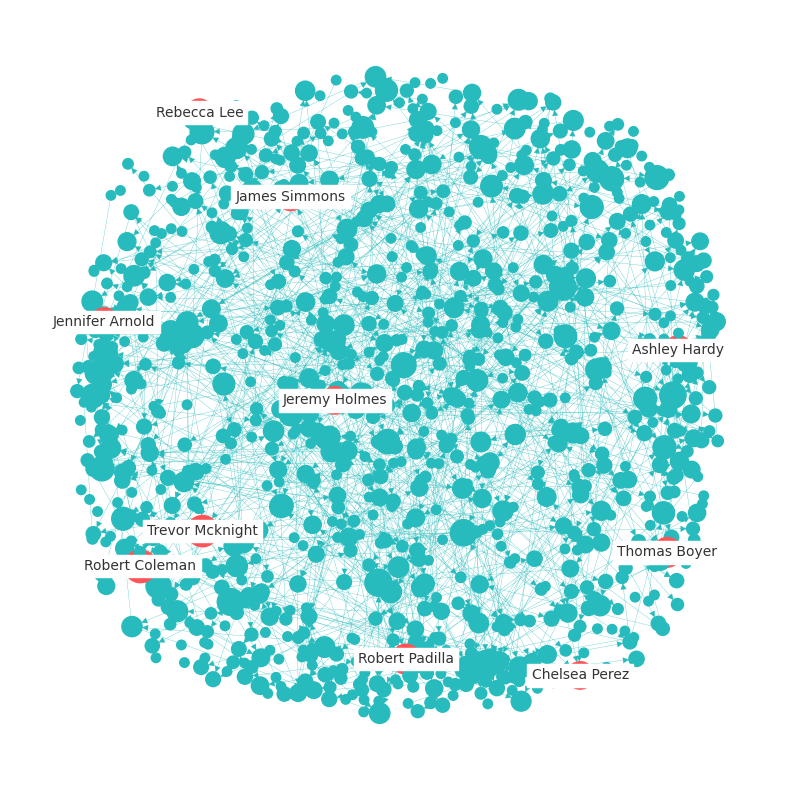

{'Robert Coleman': 0.00555, 'Trevor Mcknight': 0.00506, 'Robert Padilla': 0.00459, 'Thomas Boyer': 0.00454, 'Ashley Hardy': 0.0041, 'James Simmons': 0.00408, 'Jennifer Arnold': 0.004, 'Jeremy Holmes': 0.00394, 'Chelsea Perez': 0.00389, 'Rebecca Lee': 0.00383}


In [147]:
def page_rank(sender_id, example_data, connections):
    '''
    Топ-10 авторов с наибольшей способностью вовлекать других пользователей в дискуссию
    [пользователь | значение pagerank]
    
    sender_id - узлы (id пользователей)
    example_data - (словарь с id в качестве ключа и значений в качестве словаря из first_name и last_name)
    connections - ребра (one-to-one = id-to-id)
    '''
    G = nx.DiGraph()
    [G.add_node(k, first_name = example_data[k]['first_name'], last_name = example_data[k]['last_name']) for k in sender_id]
    G.add_edges_from(connections)
    # spring_layout - https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
    pos = nx.spring_layout(G, k=0.15, iterations=20) 

    # pagerank - https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
    pr = nx.pagerank(G)
    sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)

    top_10 = sorted_pr[:10] 
    top_10_ids = [id for id, pr in top_10]
    # топ 10 пользователей с наибольшим pagerank
    top_nodes = {node: G.nodes[node]['first_name'] + ' ' + G.nodes[node]['last_name'] for node in dict(top_10).keys()} 

    # для графа
    node_colors = ['#FF5558' if node in top_10_ids else "#27BBBD" for node in G.nodes()]
    plt.figure(figsize = (10, 10)) 
    nx.draw_networkx_labels(G, pos, 
                            labels = top_nodes, 
                            font_color = '#333335', 
                            font_size = 10, 
                            bbox = dict(facecolor='white', edgecolor='white', boxstyle='square'))
    nx.draw(G, pos, 
            nodelist = list(pr.keys()), 
            node_size = [v * 100000 for v in pr.values()], 
            with_labels = False, 
            node_color = node_colors, 
            edge_color = '#27BBBD', 
            width = 0.2)
    plt.show()

    # для таблицы "Top 20 influencers by PageRank"
    name_surname_dict = {example_data[k]['first_name'] + ' ' + example_data[k]['last_name']: round(v, 5) for k, v in top_10}
    print(name_surname_dict)
    
    
page_rank(sender_id, example_data, connections)